In [ ]:
!pip install --upgrade diffusers[torch]
!pip install --upgrade diffusers[flax]

In [13]:
import diffusers
dir(diffusers)

['AltDiffusionImg2ImgPipeline',
 'AltDiffusionPipeline',
 'AmusedImg2ImgPipeline',
 'AmusedInpaintPipeline',
 'AmusedPipeline',
 'AmusedScheduler',
 'AnimateDiffPipeline',
 'AsymmetricAutoencoderKL',
 'AudioDiffusionPipeline',
 'AudioLDM2Pipeline',
 'AudioLDM2ProjectionModel',
 'AudioLDM2UNet2DConditionModel',
 'AudioLDMPipeline',
 'AudioPipelineOutput',
 'AutoPipelineForImage2Image',
 'AutoPipelineForInpainting',
 'AutoPipelineForText2Image',
 'AutoencoderKL',
 'AutoencoderKLTemporalDecoder',
 'AutoencoderTiny',
 'BlipDiffusionControlNetPipeline',
 'BlipDiffusionPipeline',
 'CLIPImageProjection',
 'CMStochasticIterativeScheduler',
 'ConfigMixin',
 'ConsistencyDecoderVAE',
 'ConsistencyModelPipeline',
 'ControlNetModel',
 'CycleDiffusionPipeline',
 'DDIMInverseScheduler',
 'DDIMParallelScheduler',
 'DDIMPipeline',
 'DDIMScheduler',
 'DDPMParallelScheduler',
 'DDPMPipeline',
 'DDPMScheduler',
 'DDPMWuerstchenScheduler',
 'DEISMultistepScheduler',
 'DPMSolverMultistepInverseScheduler',
 

scheduler_config.json:   0%|          | 0.00/256 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/790 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/455M [00:00<?, ?B/s]

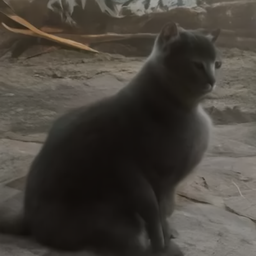

In [12]:
from diffusers import DDPMScheduler, UNet2DModel
from PIL import Image
import torch

scheduler = DDPMScheduler.from_pretrained("google/ddpm-cat-256")
model = UNet2DModel.from_pretrained("google/ddpm-cat-256").to("cuda")
scheduler.set_timesteps(50)

sample_size = model.config.sample_size
noise = torch.randn((1, 3, sample_size, sample_size), device="cuda")
input = noise

for t in scheduler.timesteps:
    with torch.no_grad():
        noisy_residual = model(input, t).sample
        prev_noisy_sample = scheduler.step(noisy_residual, t, input).prev_sample
        input = prev_noisy_sample

image = (input / 2 + 0.5).clamp(0, 1)
image = image.cpu().permute(0, 2, 3, 1).numpy()[0]
image = Image.fromarray((image * 255).round().astype("uint8"))
image

In [9]:
import requests
from PIL import Image
from io import BytesIO
from diffusers import StableDiffusionUpscalePipeline
import torch

# load model and scheduler
model_id = "stabilityai/stable-diffusion-x4-upscaler"
pipeline = StableDiffusionUpscalePipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipeline = pipeline.to("cuda")

# let's download an  image
url = "https://huggingface.co/datasets/hf-internal-testing/diffusers-images/resolve/main/sd2-upscale/low_res_cat.png"
response = requests.get(url)
low_res_img = Image.open(BytesIO(response.content)).convert("RGB")
low_res_img = low_res_img.resize((128, 128))

prompt = ""

upscaled_image = pipeline(prompt=prompt, image=low_res_img).images[0]
upscaled_image.save("upsampled_cat.png")


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]